<a href="https://colab.research.google.com/github/aysuyildizcaldiran/HearAttack/blob/main/Hear_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score,median_absolute_error

In [ ]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()  #null değeri olan columnların belirlenmesi

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

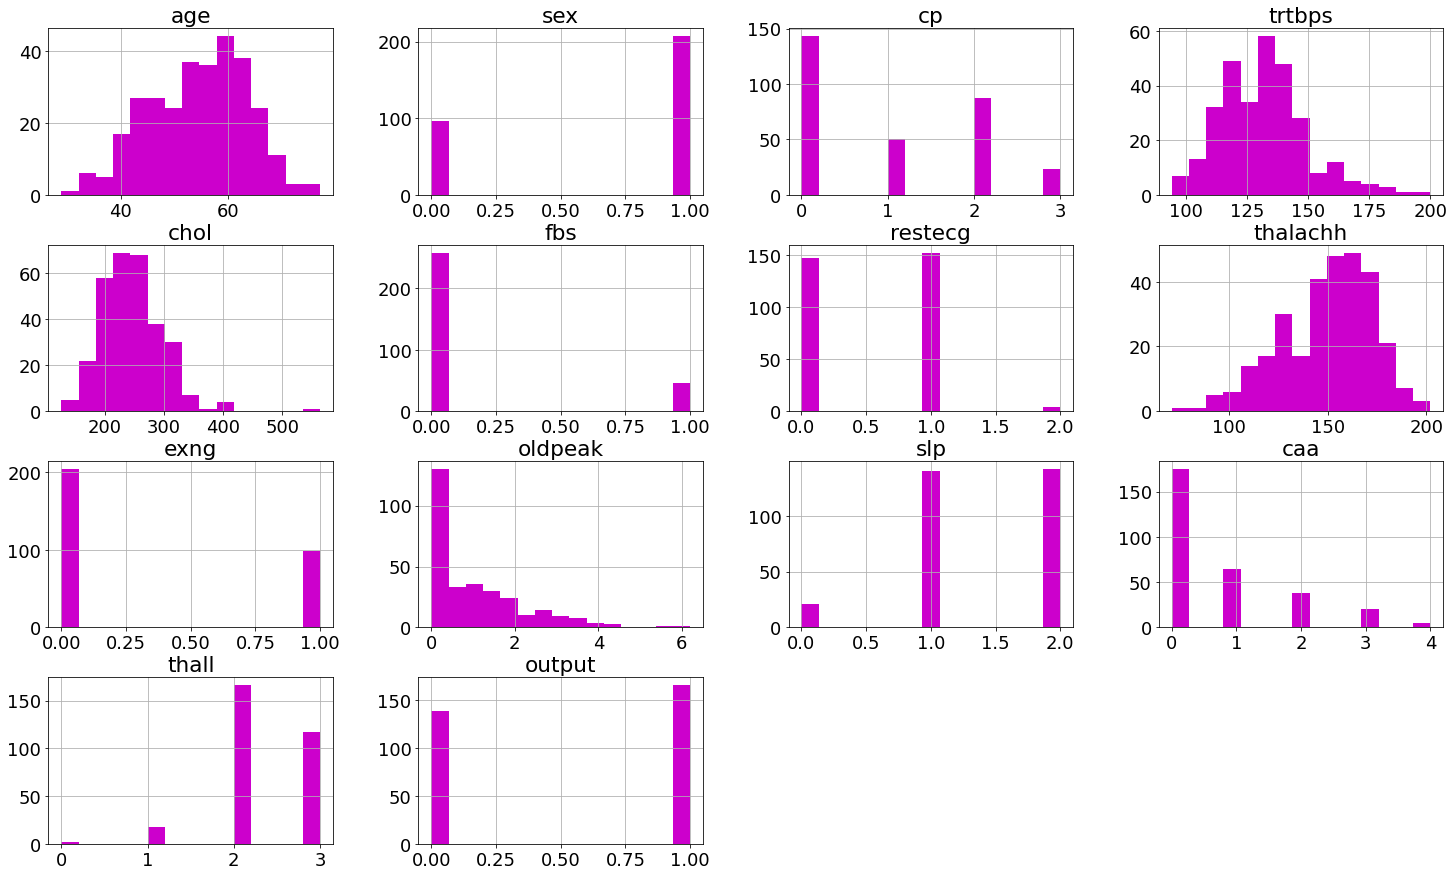

In [ ]:
color = '#CC00CC'
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

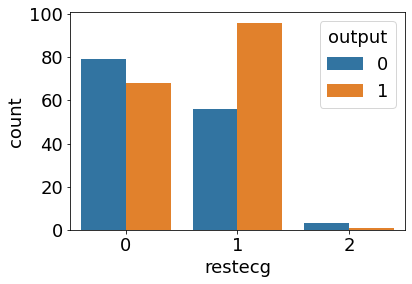

In [ ]:
sns.countplot(data=data, x="restecg", hue="output")

 elektrokardiyografik sonuçları 1 değerini yaniST-T dalgası anormalliğine sahipse kalp krizi geçirme olasılığı daha yüksek olarak düşünebiliriz..

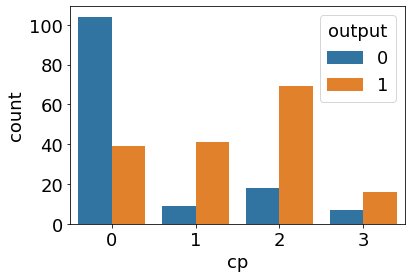

In [ ]:
sns.countplot(data=data, x="cp", hue="output")  ##Göğüs ağrı tipine göre kalp krizi geçirme olasılıkları

Göğüs kafesinde anjin olmayan ağrı görülen hastalarda kalp krizi geçirme olasığının daha yüksek olduğunu söyleyebiliriz.


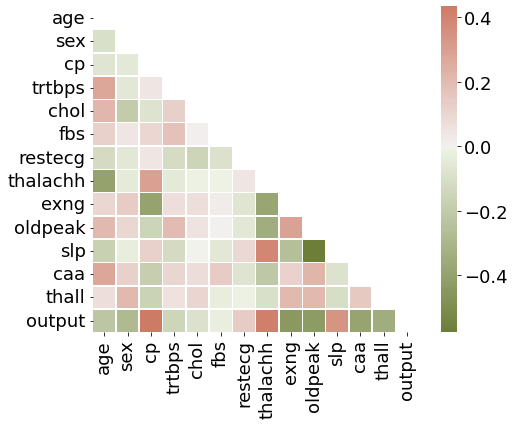

In [ ]:
corr=data.corr()   ## korelasyon
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(100,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [ ]:
# from sklearn.preprocessing import Normalizer
# norm_scaled_data = Normalizer().fit(data).transform(data)
# norm_scaled_data

In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaled_data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)

In [ ]:
x=data.drop(['output'],axis=1)  ##bağımlı ve bağımsız değişkenlerin ayrılması
y=data.output

In [ ]:
y=y.astype('int')  ##float64 olan object türünü int dönüştürme

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
ypo,dpo,esikDeger=roc_curve(y_test,y_pred)
aucDegeri=auc(ypo,dpo)
aucDegeri

0.8447712418300652

In [ ]:
print("R-Kare=%0.2f"%r2_score(y_test,y_pred))
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))

R-Kare=0.40
MAE=0.15
MSE=0.15
MedAE=0.00
RMSE=0.38


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_KNpred=classifier.predict(x_test)
ypo,dpo,esikDeger=roc_curve(y_test,y_KNpred)
aucDegeri=auc(ypo,dpo)
aucDegeri

0.6900871459694989

In [ ]:
print("R-Kare=%0.2f"%r2_score(y_test,y_KNpred))
print("MAE=%0.2f"%mean_absolute_error(y_test,y_KNpred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_KNpred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_KNpred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_KNpred)))

R-Kare=-0.26
MAE=0.31
MSE=0.31
MedAE=0.00
RMSE=0.56


In [ ]:
from sklearn.svm import SVC
svc = SVC(C = 10, gamma = 1, kernel = "linear", probability = True)
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)
ypo,dpo,esikDeger=roc_curve(y_test,ypred_svc)
aucDegeri=auc(ypo,dpo)
aucDegeri

0.8300653594771241

In [ ]:
print("R-Kare=%0.2f"%r2_score(y_test,ypred_svc))
print("MAE=%0.2f"%mean_absolute_error(y_test,ypred_svc))
print("MSE=%0.2f"%mean_squared_error(y_test,ypred_svc))
print("MedAE=%0.2f"%median_absolute_error(y_test,ypred_svc))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,ypred_svc)))

R-Kare=0.34
MAE=0.16
MSE=0.16
MedAE=0.00
RMSE=0.40


In [ ]:
from sklearn.metrics import recall_score
print(" KNeighborsClassifier recall score is --> %{}\nGaussianNB model's recall score is --> %{}\nSVC model's recall score is --> %{}\n".format(
100*recall_score(y_KNpred, y_test),100*recall_score(y_pred, y_test),100*recall_score(ypred_svc, y_test)))

 KNeighborsClassifier recall score is --> %74.19354838709677
GaussianNB model's recall score is --> %83.78378378378379
SVC model's recall score is --> %83.33333333333334



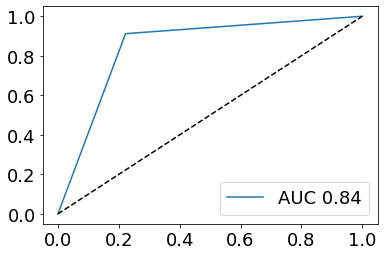

In [ ]:
ypo,dpo,esikDeger=roc_curve(y_test,y_pred)
aucDegeri=auc(ypo,dpo)
plt.figure()
plt.plot(ypo,dpo,label='AUC %0.2f'%aucDegeri)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="best")
plt.show()